# Dataset split and augmentation

In [ ]:
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def rotation(img, angle):
    """
    takes an image and angle and returns rotated version of the image by a random angle in the inverval (-angle, angle).
    """
    angle = int(np.random.uniform(-angle, angle))
    h, w = img.shape[:2]
    M = cv.getRotationMatrix2D((int(w/2), int(h/2)), angle, 1)
    img = cv.warpAffine(img, M, (w, h))

    return img, angle

In [ ]:

path_normal = "normal"
normal_dir = os.listdir(path_normal)
path_tumor = "tumor"
tumor_dir = os.listdir(path_tumor)


In [ ]:
data = []
for image_path in normal_dir:
  img = cv.imread(path_normal + "/" + image_path)
  data.append((img,"normal"))

for image_path in tumor_dir:
  img = cv.imread(path_tumor + "/" + image_path)
  data.append((img,"tumor"))



In [ ]:
np.random.shuffle(data)

data = np.array(data, dtype = "object")

train = data[:int(len(data)*(70/100))]
val = data[int(len(data)*(70/100)):int(len(data)*(85/100))]
test = data[int(len(data)*(85/100)):]

In [ ]:
augmented_images = []
for img, label in train:
  img_flipped0 = (cv.flip(img,0), label)
  img_flipped1 = ((cv.flip(img,1)), label)
  img_rotation1 = (rotation(img,50), label)
  img_rotation2 = (rotation(img,50), label)
  img_rotation3 = (rotation(img,50), label)
  img_rotation4 = (rotation(img,50), label)
  new_array = [img_flipped0,img_flipped1, img_rotation1,img_rotation2,img_rotation3,img_rotation4]
  augmented_images = augmented_images + new_array

In [ ]:
os.chdir("/content/proccessed_data")

In [ ]:

def write_images(target_dir, data_set, comment = ""):
  normal_counter = 1
  tumor_counter = 1

  for img,label in data_set:
    if label == "normal":
      os.chdir(target_dir +"/normal")
      fileName = comment +label + str(normal_counter) + ".jpg"
      cv.imwrite(fileName, img)
      normal_counter += 1
    
    elif label == "tumor":
      os.chdir(target_dir + "/tumor")
      fileName = comment + label + str(tumor_counter) + ".jpg"
      cv.imwrite(fileName, img)
      tumor_counter += 1
    

In [ ]:
os.chdir("/content/drive/MyDrive/processed_images")
!mkdir train

os.chdir("/content/drive/MyDrive/processed_images")
!mkdir val

os.chdir("/content/drive/MyDrive/processed_images")
!mkdir test


os.chdir("/content/drive/MyDrive/processed_images/train")
!mkdir original
!mkdir augmented

os.chdir("/content/drive/MyDrive/processed_images/train/original")
!mkdir normal
!mkdir tumor

os.chdir("/content/drive/MyDrive/processed_images/train/augmented")
!mkdir normal
!mkdir tumor

os.chdir("/content/drive/MyDrive/processed_images/val")
!mkdir normal
!mkdir tumor

os.chdir("/content/drive/MyDrive/processed_images/test")
!mkdir normal
!mkdir tumor


In [ ]:
target = "/content/drive/MyDrive/processed_images/train/original"
write_images(target, train, comment = "train-original")

In [ ]:
target = "/content/drive/MyDrive/processed_images/train/augmented"
write_images(target, augmented_images, comment = "train-augmented")

In [ ]:
target = "/content/drive/MyDrive/processed_images/val"
write_images(target, val, comment = "val")

In [ ]:
target = "/content/drive/MyDrive/processed_images/test"
write_images(target, test, comment = "test")

In [ ]:
img = cv.imread("/content/Normal case (5).jpg")

In [ ]:
plt.imshow(img)

In [ ]:
img_flipped0 = cv.flip(img,0)
img_flipped1 = cv.flip(img,1)
img_rotation1, angle1 = rotation(img,50)
img_rotation2, angle2 = rotation(img,50)
img_rotation3, angle3 = rotation(img,50)
img_rotation4 , angle4= rotation(img,50)

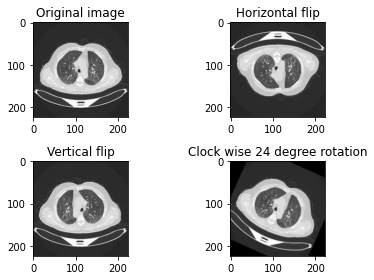

In [ ]:
plt.subplot(2, 2, 1)
plt.title("Original image")
plt.imshow(img)

plt.subplot(2, 2, 2)
plt.title("Horizontal flip")
plt.imshow(img_flipped0)

plt.subplot(2, 2, 3)
plt.title("Vertical flip")
plt.imshow(img_flipped1)

plt.subplot(2, 2, 4)
plt.title("Clock wise {} degree rotation".format(-angle2))
plt.imshow(img_rotation2)


plt.tight_layout()

# Second part pre-processing

In [ ]:
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def rotation(img, angle):
    """
    takes an image and angle and returns rotated version of the image by a random angle in the inverval (-angle, angle).
    """
    angle = int(np.random.uniform(-angle, angle))
    h, w = img.shape[:2]
    M = cv.getRotationMatrix2D((int(w/2), int(h/2)), angle, 1)
    img = cv.warpAffine(img, M, (w, h))

    return img

In [ ]:
path = "/content/drive/MyDrive/CS_project_raw"
normal_path = os.path.join(path, "Normal cases")
malignant_path = os.path.join(path, "Malignant cases")
benign_path = os.path.join(path, "Bengin cases")

normal_dir = os.listdir(normal_path)
malignant_dir = os.listdir(malignant_path)
benign_dir = os.listdir(benign_path)

In [ ]:
data = []
for image_path in normal_dir:
    img = cv.imread(normal_path + "/" + image_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img = cv.resize(img, (224,224))
    data.append((img,"normal"))

for image_path in benign_dir:
    img = cv.imread(benign_path + "/" + image_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img = cv.resize(img, (224,224))
    data.append((img,"benign"))

for image_path in malignant_dir:
    img = cv.imread(malignant_path + "/" + image_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img = cv.resize(img, (224,224))
    data.append((img,"malignant"))

In [ ]:
np.random.shuffle(data)

data = np.array(data, dtype = "object")

train = data[:int(len(data)*(70/100))]
val = data[int(len(data)*(70/100)):int(len(data)*(85/100))]
test = data[int(len(data)*(85/100)):]

In [ ]:
print("train:",len(train))
print("val:",len(val))
print("test:",len(test))

train: 767
val: 165
test: 165


In [ ]:
wunq,counts = np.unique(train[:,-1],return_counts = True)

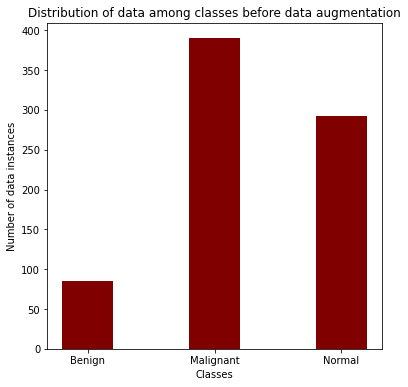

In [ ]:
fig = plt.figure(figsize = (6, 6))
 
# creating the bar plot
plt.bar([x.capitalize() for x in list(unq)], counts, color ='maroon',
        width = 0.4)
 
plt.xlabel("Classes")
plt.ylabel("Number of data instances")
plt.title("Distribution of data among classes before data augmentation")
plt.show()

In [ ]:
augmented_images = []
num_rotation_malignant = 2
num_rotation_normal = 4
num_rotation_benign = 15
for img, label in train:
    img_flipped0 = (cv.flip(img,0), label)
    img_flipped1 = ((cv.flip(img,1)), label)
    rotated_images = []
    if label == "malignant":
        for _ in range(num_rotation_malignant):
            rotated_images.append((rotation(img,50), label))

    elif label == "normal": 
        for _ in range(num_rotation_normal):
            rotated_images.append((rotation(img,50), label))

    elif label == "benign": 
        for _ in range(num_rotation_benign):
            rotated_images.append((rotation(img,50), label))

    flipped_images = [img_flipped0,img_flipped1]
    augmented_images = augmented_images + flipped_images + rotated_images

In [ ]:
augmented_images = np.array(augmented_images, dtype = object)

In [ ]:
unq_train, counts_train = np.unique(train[:,-1],return_counts = True)
unq_aug, counts_aug = np.unique(augmented_images[:,-1],return_counts = True)

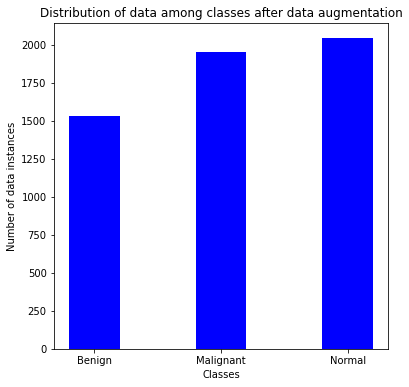

In [ ]:
fig = plt.figure(figsize = (6, 6))
 
# creating the bar plot
plt.bar([x.capitalize() for x in list(unq)], counts + counts_aug, color ='blue',
        width = 0.4)
 
plt.xlabel("Classes")
plt.ylabel("Number of data instances")
plt.title("Distribution of data among classes after data augmentation")
plt.show()

In [ ]:
try:
    os.mkdir("/content/drive/MyDrive/part2images/train")
    os.mkdir("/content/drive/MyDrive/part2images/val")
    os.mkdir("/content/drive/MyDrive/part2images/test")
except:
    pass

In [ ]:
os.chdir("/content/drive/MyDrive/part2images/train")
for i,instance in enumerate(train):
    img,label = instance
    fileName = str(i)+"-"+label+"-"+"original.jpg"
    cv.imwrite(fileName, img)
    

In [ ]:
os.chdir("/content/drive/MyDrive/part2images/train")
for i,instance in enumerate(augmented_images):
    img,label = instance
    fileName = str(i)+"-"+label+"-"+"augmented.jpg"
    cv.imwrite(fileName, img)
    

In [ ]:
os.chdir("/content/drive/MyDrive/part2images/val")
for i,instance in enumerate(val):
    img,label = instance
    fileName = str(i)+"-"+label+"-"+"original.jpg"
    cv.imwrite(fileName, img)
    

In [ ]:
os.chdir("/content/drive/MyDrive/part2images/test")
for i,instance in enumerate(test):
    img,label = instance
    fileName = str(i)+"-"+label+"-"+"original.jpg"
    cv.imwrite(fileName, img)
    